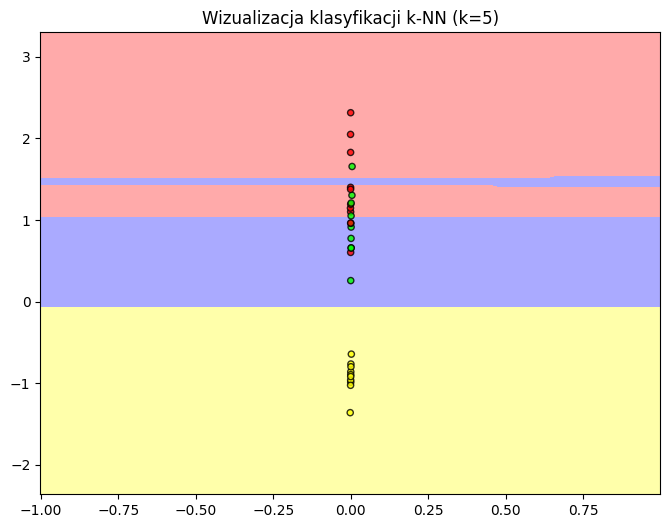

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap

# Generowanie przykładowych danych
n_classes = 3
n_samples_per_class = 10
# Ustawienie ziarna losowości
seed_value = 13  # Możesz zmienić na dowolny inny numer, aby ustawić własny seed

X, y = datasets.make_classification(n_samples=n_classes*n_samples_per_class, n_features=2, n_informative=2,
                                     n_redundant=0, n_clusters_per_class=1, n_classes=n_classes, random_state=seed_value)
X[:,0]=0.001*X[:,0]

# Inicjalizacja klasyfikatora k-NN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)


# Tworzenie siatki punktów do wyświetlenia obszarów klasyfikacji
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predykcja na siatce
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wizualizacja wyników klasyfikacji
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00'])

plt.figure(figsize=(8, 6))

# Rysowanie obszarów klasyfikacji
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=1)

# Rysowanie punktów treningowych z większą przezroczystością
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', marker='o', s=20, alpha=0.8)

plt.title(f'Wizualizacja klasyfikacji k-NN (k={k})')
plt.show()



# Ocena modelu

Podział na Train/Test -- model nie może widzieć zbioru danych  na którym go oceniamy, bo sprawdzamy wtedy czy nauczył się na pamięć, a nie czy generalizuje.

TEST - MOŻEMY JEDYNIE RAZ SPRAWDZIĆ

Accuracy -- prawdopodobieństwo, że model zwrócił prawidłowy wynik
Balanced Accuracy -- w sytuacji gdy dane nie są zbalansowane, wyliczamy acc tak jakby były

Confusion matrix -- macierz pomyłek, podajemy prawidłowe etykiety vs przewidywane, ważne, gdyż często w realnych modelach mamy inne znaczenie różnych błędów (dla przykładu medycyna)

# Optymalizacja hiperparametrów

Model nie możemy testować na test set (mamy dostęp do niego tylko raz pod koniec uczenia). W związku z tym, jak chcemy dobierać parametry, tworzymy sztuczny zbiór (nazywamy walidacyjnym), na którym sprawdzam

# Walidacja krzyżowa
Chcielibyśmy mieć wiarygodną ocenę modelu, w związku

# Miary oceny modelu
oceniamy na train i test, jeżeli duża różnica overfitting (nauczył się na pamięć)


# Miary oceny modelu klasyfikacyjnego

Poniżej przedstawiam skrótowy opis najważniejszych miar używanych do oceny modeli klasyfikacyjnych:

## 1. Macierz pomyłek (Confusion Matrix)

Macierz pomyłek to tabela, która przedstawia wyniki klasyfikacji w postaci czterech wartości:
- **True Positive (TP)**: Poprawnie zaklasyfikowane przypadki pozytywne.
- **True Negative (TN)**: Poprawnie zaklasyfikowane przypadki negatywne.
- **False Positive (FP)**: Błędnie zaklasyfikowane przypadki negatywne jako pozytywne (błąd I rodzaju).
- **False Negative (FN)**: Błędnie zaklasyfikowane przypadki pozytywne jako negatywne (błąd II rodzaju).

Przykład macierzy pomyłek:

|                | Przewidywane: Pozytywne | Przewidywane: Negatywne |
|----------------|-------------------------|-------------------------|
| **Rzeczywiste: Pozytywne** | TP                      | FN                      |
| **Rzeczywiste: Negatywne** | FP                      | TN                      |

## 2. Dokładność (Accuracy)

Dokładność to stosunek poprawnie zaklasyfikowanych przypadków do wszystkich przypadków. Oblicza się ją wzorem:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Zaleta**: Łatwa do interpretacji.
- **Wada**: Nie sprawdza się dobrze w przypadku niezrównoważonych klas.

Inaczej - prawdopodobieństwo, że model zwrócił prawidłowy wynik

## 3. Precyzja (Precision)

Precyzja mierzy, jak wiele spośród przewidzianych przypadków pozytywnych jest rzeczywiście pozytywnych. Oblicza się ją wzorem:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Interpretacja**: Wysoka precyzja oznacza, że model rzadko myli przypadki negatywne z pozytywnymi.

## 4. Czułość (Recall, Sensitivity)

Czułość mierzy, jak wiele spośród rzeczywistych przypadków pozytywnych zostało poprawnie zaklasyfikowanych. Oblicza się ją wzorem:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Interpretacja**: Wysoka czułość oznacza, że model rzadko pomija przypadki pozytywne.

## 5. F1-Score

F1-Score to średnia harmoniczna precyzji i czułości. Oblicza się ją wzorem:
$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Interpretacja**: F1-Score jest użyteczny, gdy chcemy znaleźć równowagę między precyzją a czułością, szczególnie w przypadku niezrównoważonych klas.

## Podsumowanie

- **Confusion Matrix**: Podstawowa tabela do oceny klasyfikacji.
- **Accuracy**: Ogólna dokładność modelu.
- **Precision**: Skupia się na błędach typu FP.
- **Recall**: Skupia się na błędach typu FN.
- **F1-Score**: Równowaga między precyzją a czułością.

Te miary są kluczowe do oceny i porównywania modeli klasyfikacyjnych.

Dokładność modelu: 0.82
Macierz pomyłek:
[[18  0  8  0]
 [ 4 18  0  6]
 [ 2  0 28  0]
 [ 0  0  2 34]]


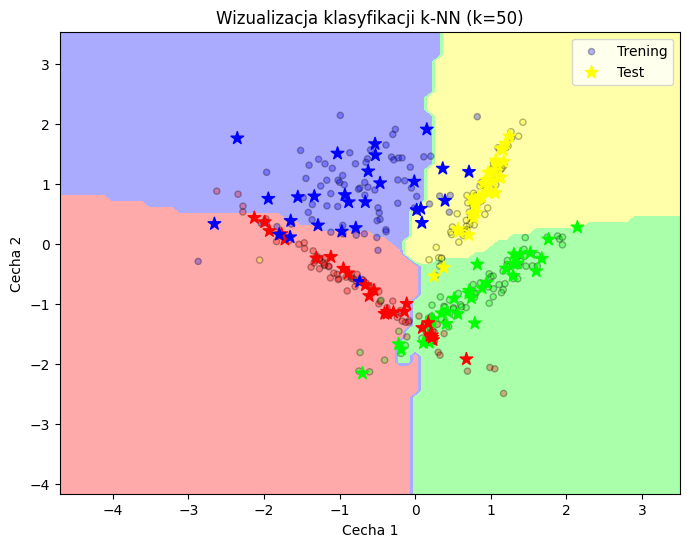

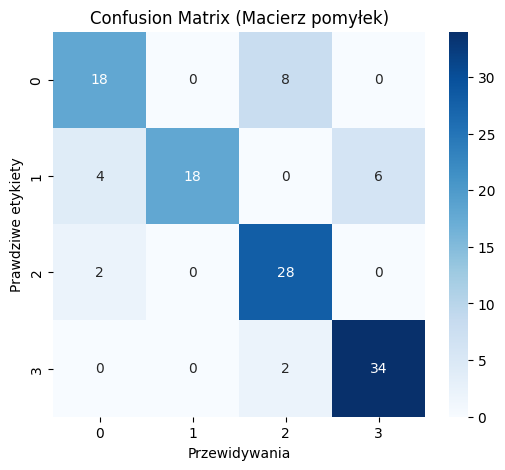

In [ ]:
# Generowanie przykładowych danych
n_classes = 4
n_samples_per_class = 100
# Ustawienie ziarna losowości
seed_value = 13  # Możesz zmienić na dowolny inny numer, aby ustawić własny seed

X, y = datasets.make_classification(n_samples=n_classes*n_samples_per_class, n_features=2, n_informative=2,
                                     n_redundant=0, n_clusters_per_class=1, n_classes=n_classes, random_state=seed_value)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicjalizacja klasyfikatora k-NN
k = 50
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


# Predykcja na zbiorze testowym
y_pred = knn.predict(X_test)
# Obliczanie dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.2f}')

# Obliczanie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(cm)

# Tworzenie siatki punktów do wyświetlenia obszarów klasyfikacji
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predykcja na siatce
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wizualizacja wyników klasyfikacji
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00'])

plt.figure(figsize=(8, 6))

# Rysowanie obszarów klasyfikacji
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=1)

# Rysowanie punktów treningowych z większą przezroczystością
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', marker='o', s=20, alpha=0.3, label="Trening")
# Rysowanie punktów testowych
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, marker='*', s=90, label="Test")

plt.title(f'Wizualizacja klasyfikacji k-NN (k={k})')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend(loc='best')
plt.show()

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Przewidywania')
plt.ylabel('Prawdziwe etykiety')
plt.title('Confusion Matrix (Macierz pomyłek)')
plt.show()
